### Establish Connections to Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine

### Import the SQL database into Pandas

In [2]:
dbuser = 'postgres'
dbpassword = 'postgres'
dbhost = 'localhost'
dbport = '5432'
dbname= 'sql_challenge'

engine = create_engine(f"postgres://{dbuser}:{dbpassword}@{dbhost}:{dbport}/{dbname}")
connection = engine.connect()

df_t = pd.read_sql_table('titles',engine)
df_s = pd.read_sql_table('salaries',engine)
df_e = pd.read_sql_table('employees',engine)



### Create a histogram to visualize the most common salary ranges for employees

Text(0.5, 1.0, 'Common Salary Ranges for Employees')

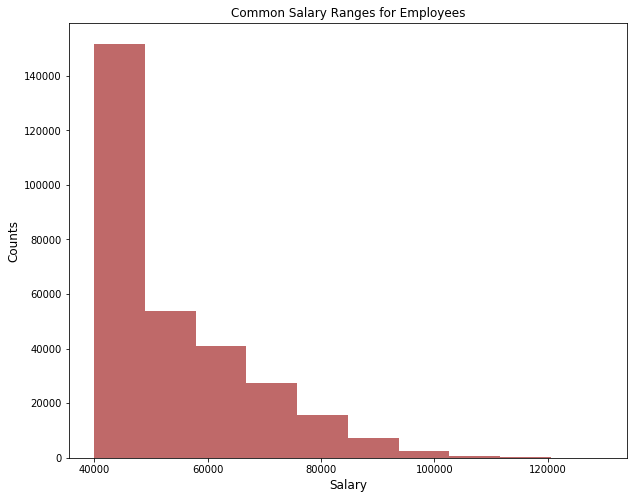

In [3]:
plt.figure(figsize=(10,8),facecolor='white')
plt.hist(df_s['salary'], color='brown',alpha=0.7)
plt.ylabel('Counts',fontsize=12)
plt.xlabel("Salary",fontsize=12)
plt.title("Common Salary Ranges for Employees",fontsize=12)

### Create a bar chart of average salary by title

In [5]:
# Merge Salaries and Employees Dataframe to create Salaries_Employees Dataframe
df_s_e = pd.merge(df_s, df_e, on = 'emp_no')
# Rename emp_title_id column in preparation for merge with titles dataframe
df_s_e=df_s_e.rename(columns={'emp_title_id':'title_id'})
df_s_e.head()

,emp_no,salary,title_id,birth_date,first_name,last_name,sex,hire_date
0,10001,60117,e0003,1953-09-02,Georgi,Facello,M,1986-06-26
1,10002,65828,s0001,1964-06-02,Bezalel,Simmel,F,1985-11-21
2,10003,40006,e0003,1959-12-03,Parto,Bamford,M,1986-08-28
3,10004,40054,e0003,1954-05-01,Chirstian,Koblick,M,1986-12-01
4,10005,78228,s0001,1955-01-21,Kyoichi,Maliniak,M,1989-09-12


In [6]:
# Merge Salaries_Employees dataframe with titles dataframe
df_set = pd.merge(df_s_e, df_t, on = 'title_id')
df_set.head()

,emp_no,salary,title_id,birth_date,first_name,last_name,sex,hire_date,title
0,10001,60117,e0003,1953-09-02,Georgi,Facello,M,1986-06-26,Senior Engineer
1,10003,40006,e0003,1959-12-03,Parto,Bamford,M,1986-08-28,Senior Engineer
2,10004,40054,e0003,1954-05-01,Chirstian,Koblick,M,1986-12-01,Senior Engineer
3,10006,40000,e0003,1953-04-20,Anneke,Preusig,F,1989-06-02,Senior Engineer
4,10009,60929,e0003,1952-04-19,Sumant,Peac,F,1985-02-18,Senior Engineer


In [7]:
# Create a new data frame by title and average salary
grouped_df_set = df_set.groupby(['title'])
grouped_df_set2 = grouped_df_set['salary'].mean()
new_df = pd.DataFrame(grouped_df_set2)
new_df = new_df.reset_index()
new_df.head()

,title,salary
0,Assistant Engineer,48564.434447
1,Engineer,48535.336511
2,Manager,51531.041667
3,Senior Engineer,48506.799871
4,Senior Staff,58550.172704


Text(0, 0.5, 'Salary')

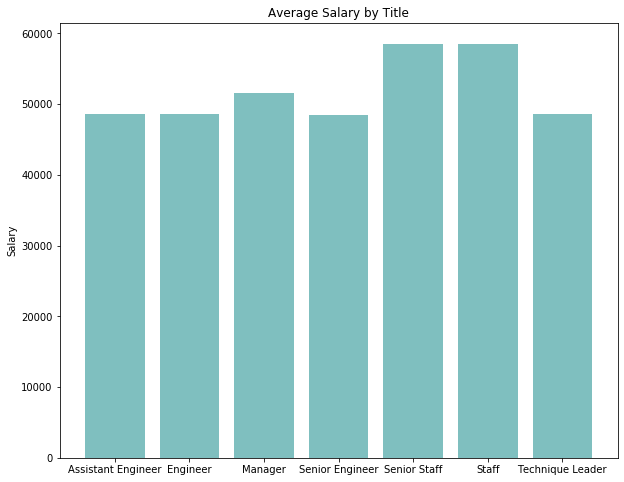

In [8]:
# Plot bar chart
x = new_df['title']
salary = new_df['salary']

plt.figure(figsize=(10,8),facecolor='white')
plt.bar(x=x,height=salary, color='teal', alpha=0.5, align="center")

plt.title("Average Salary by Title")
plt.ylabel("Salary")